In [5]:
from pymatgen.io.cif import CifParser,CifWriter
from pymatgen import Structure, Lattice, MPRester, Molecule
from pymatgen.analysis.adsorption import *
from pymatgen.core.surface import generate_all_slabs
from pymatgen.core.surface import  SlabGenerator
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from matplotlib import pyplot as plt
from pymatgen.core.lattice import Lattice
%matplotlib inline
parser = CifParser("coo2mono.cif")
structure = parser.get_structures()[0]
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))


a=structure.lattice.matrix
a[2][2]=4
struc=Structure(Lattice(a),structure.species,structure.cart_coords,coords_are_cartesian=True)

slab=SlabGenerator(structure, (0,0,1), 2, 10).get_slabs(bonds={("C", "O"): 5},symmetrize=False)[0]

CifWriter(slab).write_file('coo2small.cif') 

In [11]:
coo2_001=AdsorbateSiteFinder(slab)
Layer="Li"
adsorbate = Molecule([Layer], [[0, 0, 0]])
ads_structs = coo2_001.adsorb_both_surfaces(adsorbate,repeat=[4,4, 1])

for i in range(len(ads_structs)):
    CifWriter(ads_structs[i]).write_file('coo2_adsorb_super_'+str(i)+'.cif') 
    


In [23]:
coo2_001=AdsorbateSiteFinder(slab)
Layer="Be"
adsorbate = Molecule([Layer], [[0, 0, 0]])
ads_structs = coo2_001.generate_adsorption_structures(adsorbate,repeat=[1,1, 1])

for i in range(len(ads_structs)):
    CifWriter(ads_structs[i]).write_file('coo2_adsorb_Be'+str(i)+'.cif') 
    




In [ ]:
parser = CifParser("coo2mono.cif")
structure = parser.get_structures()[0]
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))


a=structure.lattice.matrix
a[2][2]=4
struc=Structure(Lattice(a),structure.species,structure.cart_coords,coords_are_cartesian=True)

slab=SlabGenerator(structure, (0,0,1), 2, 10).get_slabs(bonds={("C", "O"): 5},symmetrize=False)[0]

CifWriter(slab).write_file('coo2small.cif') 

In [78]:
a=structure.lattice.matrix
a[2][2]=4
struc=Structure(Lattice(a),structure.species,structure.cart_coords,coords_are_cartesian=True)
slab=SlabGenerator(struc, (0,0,1), 2, 4).get_slabs(bonds={("C", "O"): 6})[0]
CifWriter(slab).write_file('coo2small.cif') 

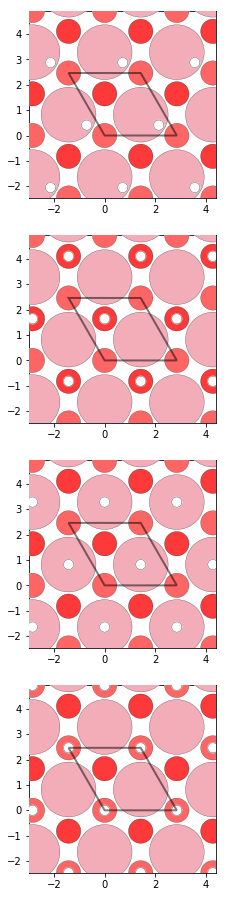

In [163]:
ads_structs = coo2_001.adsorb_both_surfaces(adsorbate,repeat=[1,1,1])
fig = plt.figure(figsize=(20, 20))
for i in range(len(ads_sites)):
    ax = fig.add_subplot(len(ads_structs)+1,1,i+1)
    adsorbate = Molecule("H", [[0, 0, 0]])
    plot_slab(ads_structs[i], ax, adsorption_sites=False, decay=0.09)
CifWriter(ads_structs[2]).write_file('coo2adsorption.cif') 

In [53]:
def get_pos():
    with open('positions', 'r') as f:
            # do things with your file
            data = f.read()
            a=data.split("\n")
    pos=[]
    for i in a:
        pos.append(map(float,i.split('   ')[1:4]))
    del(pos[-1])
    return np.array(pos)
def get_en():
    with open('energy', 'r') as f:
            # do things with your file
            data = f.read()
            a=data.split("\n")
    mmom=[]
    en=[]
    del(a[-1])
    for i in a:
        mmom.append(float(i.split(" ")[3].split("=")[-1]))
        en.append(float(i.split(" ")[-1].split("=")[-1]))
    return np.array(en),np.array(mmom)
pos=get_pos()
energy,mmom=get_en()

In [315]:
def get_pos1():
    with open('positions', 'r') as f:
            # do things with your file
            data = f.read()
            a=data.split("\n")
    pos=[]
    for i in a:
        pos.append(filter(None,i.split(" ")))
    del(pos[-1])
    return np.array(pos)
def get_en1():
    with open('energy', 'r') as f:
            # do things with your file
            data = f.read()
            a=data.split("\n")
    mmom=[]
    en=[]
    del(a[-1])
    for i in a:
        mmom.append(float(i.split(" ")[3].split("=")[-1]))
        en.append(float(i.split(" ")[-1].split("=")[-1]))
    return np.array(en),np.array(mmom)
def get_pos():
    with open('positions_old', 'r') as f:
            # do things with your file
            data = f.read()
            a=data.split("\n")
    pos=[]
    for i in a:
        pos.append(filter(None,i.split(" ")))
    del(pos[-1])
    return np.array(pos)
def get_en():
    with open('energy_old', 'r') as f:
            # do things with your file
            data = f.read()
            a=data.split("\n")
    mmom=[]
    en=[]
    del(a[-1])
    for i in a:
        mmom.append(float(i.split(" ")[3].split("=")[-1]))
        en.append(float(i.split(" ")[-1].split("=")[-1]))
    return np.array(en),np.array(mmom)

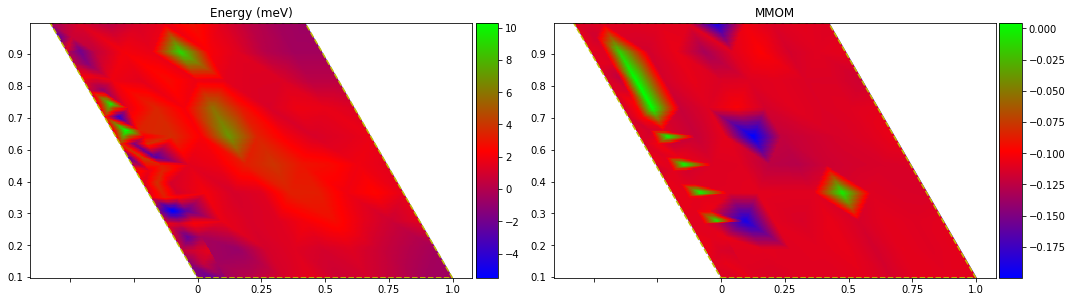

In [541]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
pos1=get_pos1()
energy1,mmom1=get_en1()
pos=get_pos()
energy,mmom=get_en()

k=0
x=[]
y=[]
for i in np.linspace(0,1,10):
    for j in np.linspace(0,1,10):
        if k>7:
            x.append(i)
            y.append(j)
        k=k+1
        
z=energy
m=mmom

x1=[float(t) for t in pos1[:,0]]
y1=[float(t) for t in pos1[:,1]]
z1=energy1
m1=mmom1
from scipy.interpolate import griddata
X=x+x1
Y=y+y1
Z=np.concatenate([z,z1])
Z1=np.concatenate([mmom,mmom1])
Z=(Z-Z[0])*13.605698066*1000
fig, (ax,ax1) = plt.subplots(1,2,figsize=(15,15))
xi,yi=np.mgrid[0:1:200j, 0:1:200j]
zi = griddata((X, Y), Z, (xi, yi), method='linear')
zi_mmom = griddata((X, Y), Z1, (xi, yi), method='linear')

def do_plot(ax, Z, transform):
    im = ax.imshow(Z, interpolation='None',
                   origin='lower',
                    clip_on=True,cmap='brg')

    trans_data = transform + ax.transData
    im.set_transform(trans_data)
    
    # display intended extent of the image
    x1, x2, y1, y2 = im.get_extent()
    ax.set_xticklabels(['', '','',0,1/4.0,2/4.0,3/4.0,4/4.0])
    ax.set_yticklabels(np.round(np.linspace(0,1,10),1))
    plot1=ax.plot([x1, x2, x2, x1, x1], [y1, y1, y2, y2, y1], "y--",
            transform=trans_data)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    return plot1

     


plt1=do_plot(ax,zi.T,mtransforms.Affine2D().skew_deg(-30, 0))#ax.imshow(zi.T,cmap='gist_heat')
ax.set_title("Energy (meV)")



#plt.colorbar(plt1,cax=ax)
plt2=do_plot(ax1,zi_mmom.T,mtransforms.Affine2D().skew_deg(-30, 0))
ax1.set_title("MMOM")
#plt.title('griddata test (%d points)' % npts)
fig.tight_layout() 
plt.show()

In [542]:
def get_en():
    with open('energy', 'r') as f:
            # do things with your file
            data = f.read()
            a=data.split("\n")
    mmom=[]
    en=[]
    del(a[-1])
    for i in a:
        mmom.append(float(i.split(" ")[3].split("=")[-1]))
        en.append(float(i.split(" ")[-1].split("=")[-1]))
    return np.array(en),np.array(mmom)

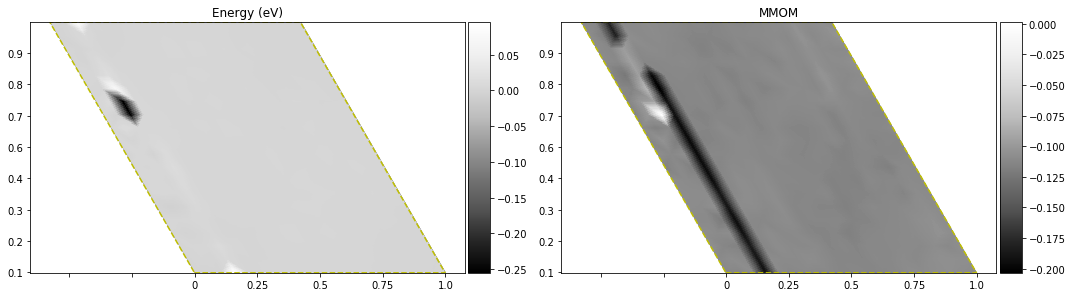

In [567]:
energy,mmom=get_en()
x=[]
y=[]
for i in np.linspace(0,1,20):
    for j in np.linspace(0,1,20):
        x.append(i)
        y.append(j)
z=energy
m=mmom

from scipy.interpolate import griddata
X=x
Y=y
Z=energy
Z1=mmom
Z=(Z-Z[0])*13.605698066
fig, (ax,ax1) = plt.subplots(1,2,figsize=(15,15))
xi,yi=np.mgrid[0:1:200j, 0:1:200j]
zi = griddata((X, Y), Z, (xi, yi), method='linear')
zi_mmom = griddata((X, Y), Z1, (xi, yi), method='linear')

def do_plot(ax, Z, transform):
    im = ax.imshow(Z, interpolation='None',
                   origin='lower',
                    clip_on=True,cmap='Greys_r')

    trans_data = transform + ax.transData
    im.set_transform(trans_data)
    
    # display intended extent of the image
    x1, x2, y1, y2 = im.get_extent()
    ax.set_xticklabels(['', '','',0,1/4.0,2/4.0,3/4.0,4/4.0])
    ax.set_yticklabels(np.round(np.linspace(0,1,10),1))
    plot1=ax.plot([x1, x2, x2, x1, x1], [y1, y1, y2, y2, y1], "y--",
            transform=trans_data)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    return plot1

     


plt1=do_plot(ax,zi.T,mtransforms.Affine2D().skew_deg(-30, 0))#ax.imshow(zi.T,cmap='gist_heat')
ax.set_title("Energy (eV)")



#plt.colorbar(plt1,cax=ax)
plt2=do_plot(ax1,zi_mmom.T,mtransforms.Affine2D().skew_deg(-30, 0))
ax1.set_title("MMOM")
#plt.title('griddata test (%d points)' % npts)
fig.tight_layout() 
fig.savefig("enery-mmom.png")
plt.show()